In [1]:
import pandas as pd

In [2]:
movies = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv")

In [3]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
dummies = movies.genres.str.get_dummies()
dados_dos_filmes = pd.concat([movies, dummies], axis=1)

In [5]:
dados_dos_filmes.head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
generos_escalados = scaler.fit_transform(dummies)

/home/gabriel/anaconda3/envs/Kaggle_Santander/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/gabriel/anaconda3/envs/Kaggle_Santander/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [9]:
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

# Clusterizando filmes com KMeans

In [10]:
from sklearn.cluster import KMeans

In [12]:
modelo = KMeans(n_clusters=3)

In [13]:
modelo.fit(generos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [16]:
modelo.labels_

array([1, 1, 0, ..., 0, 1, 0], dtype=int32)

In [17]:
modelo.cluster_centers_

array([[ 0.03480946, -0.28477163, -0.22093888, -0.2519552 , -0.26915746,
         0.19495594, -0.18903877,  0.12400144,  0.16724425, -0.16678672,
        -0.07759683, -0.16208904, -0.10645634,  0.01764893, -0.18762601,
         0.18547585, -0.23416698, -0.47272163,  0.08775057,  0.04251347],
       [-0.05917995,  0.13466656,  1.11472497,  1.93303294,  2.11250048,
         0.15756617, -0.32477665, -0.19996291, -0.60014413,  1.21145499,
        -0.09492563, -0.2674432 ,  0.31102141,  0.31164845, -0.13783356,
        -0.27300025,  0.1405016 , -0.47056597, -0.16920423, -0.09000487],
       [-0.05917995,  0.63722226,  0.05187577, -0.23073335, -0.26728823,
        -0.54564567,  0.60442142, -0.21557018, -0.14600153, -0.12288533,
         0.23128824,  0.51342138,  0.12402975, -0.17965731,  0.51908213,
        -0.33387071,  0.51094818,  1.361828  , -0.14041711, -0.06451267]])

In [22]:
centers = pd.DataFrame(modelo.cluster_centers_, columns=dummies.columns)

In [23]:
centers.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.034809,-0.284772,-0.220939,-0.251955,-0.269157,0.194956,-0.189039,0.124001,0.167244,-0.166787,-0.077597,-0.162089,-0.106456,0.017649,-0.187626,0.185476,-0.234167,-0.472722,0.087751,0.042513
1,-0.059180,0.134667,1.114725,1.933033,2.112500,0.157566,-0.324777,-0.199963,-0.600144,1.211455,-0.094926,-0.267443,0.311021,0.311648,-0.137834,-0.273000,0.140502,-0.470566,-0.169204,-0.090005
2,-0.059180,0.637222,0.051876,-0.230733,-0.267288,-0.545646,0.604421,-0.215570,-0.146002,-0.122885,0.231288,0.513421,0.124030,-0.179657,0.519082,-0.333871,0.510948,1.361828,-0.140417,-0.064513


In [29]:
import matplotlib
%matplotlib inline

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ffaecee8080>,
      dtype=object)

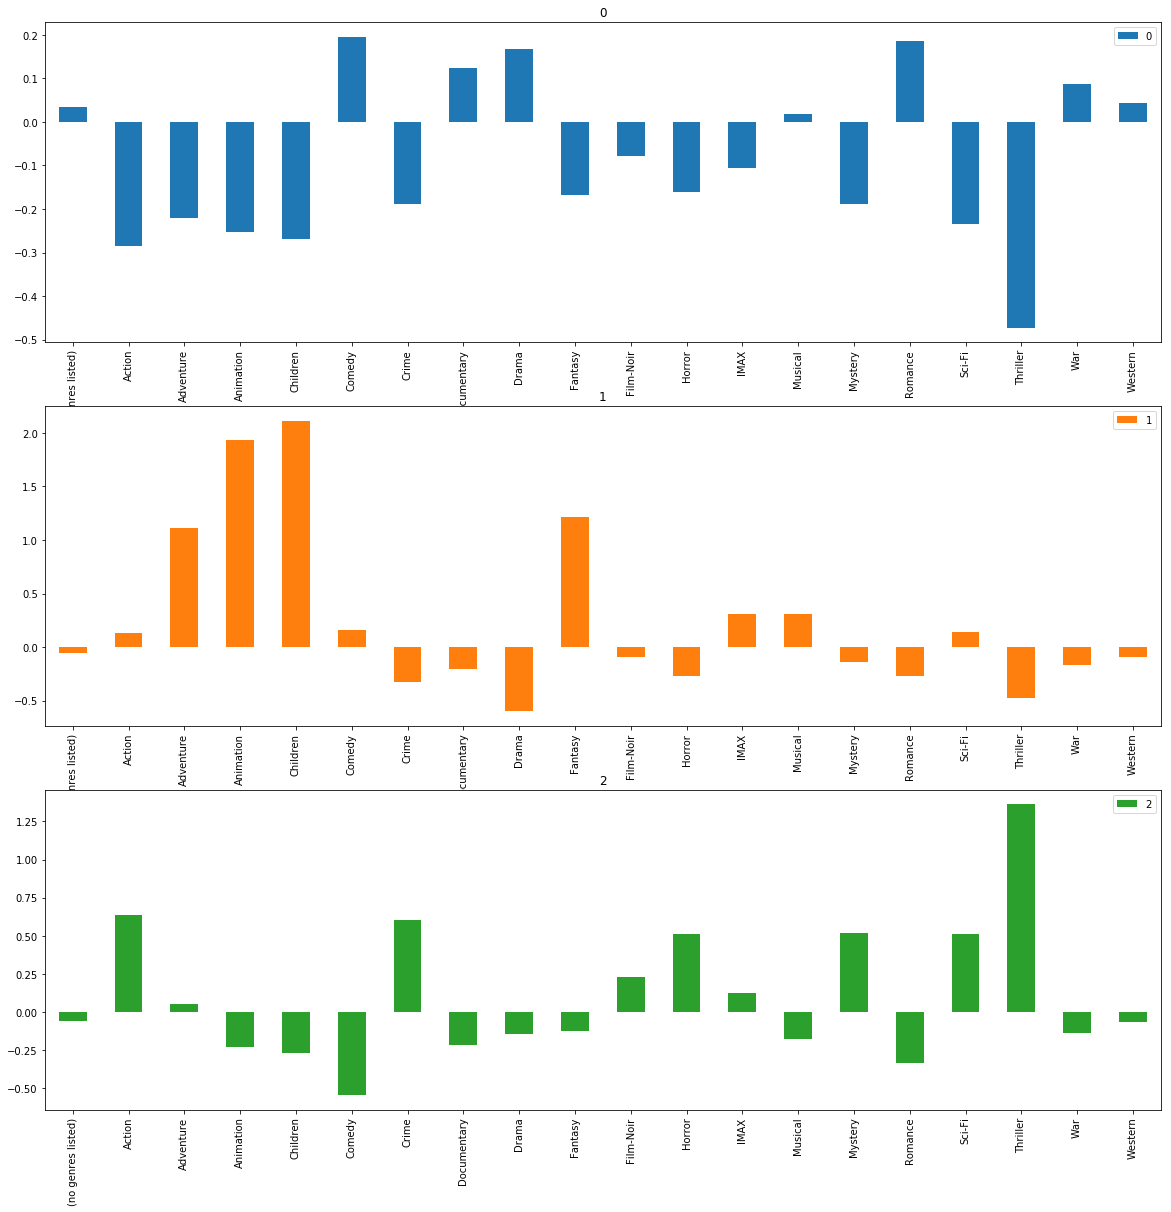

In [38]:
centers.transpose().plot.bar(subplots=True, figsize=(20,20), sharex=False)

In [44]:
grupo = 2

mask = modelo.labels_ == grupo

dados_dos_filmes[mask].head()

,movieId,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
5,6,Heat (1995),Action|Crime|Thriller,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
9,10,GoldenEye (1995),Action|Adventure|Thriller,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
19,20,Money Train (1995),Action|Comedy|Crime|Drama|Thriller,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
20,21,Get Shorty (1995),Comedy|Crime|Thriller,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
21,22,Copycat (1995),Crime|Drama|Horror|Mystery|Thriller,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,1,0,0
